# TP2 : Convolution et filtrage

Dans le domaine du traitement d'images et d'intelligence artificielle appliquées aux images, la notion de **convolution** joue un rôle fondamental. Comme vu à l'amphi, les matrices de convolution peuvent servir à réduire le bruit et à détecter les contours horizontaux et verticaux d'une image. D'ailleurs, parmi les algorithmes de classification d'images et de détection d'objets les plus performants, on peut citer les **Réseaux de Neurones Convolutifs**, ou _Convolution Neural Networks_ (CNNs) en anglais, qui sont composés d'un enchaînement de convolutions permettant d'extraire des caractéristiques des images d'entrée.

Dans ce TP, nous allons étudier les notions suivantes :
* convolution (notion de masque et de produit de convolution)
* filtrage spatial linéaire (filtre moyenneur, filtre gaussien)
* filtrage non-linéaire (filtre médian)
* mise en œuvre avec Python

## Import des modules de base

Exécutez la cellule suivante afin d'importer les modules **Numpy**, **Matplotlib** et **OpenCV**. Cette cellule doit être exécutée à chaque fois que vous réinitialisez le _kernel_.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

## 1 Produit de convolution et filtrage spatial linéaire (moyenneur et gaussien)

### 1.1 Convolution 

Écrivez une fonction ```convolution2D(I,h)``` qui, étant donnés une image ```I``` et un filtre ```h```, renvoie l’image filtrée $I_f$ résultat de la convolution linéaire de ```h``` par ```I``` (on supposera que la matrice ```h``` a des dimensions impaires). Pour la gestion des bords (_padding_), on considérera que l’image est entourée de 0. Les fonctions _np.multiply_ et _np.sum_ peuvent vous être utiles.

In [34]:

def convolution2D(I,h):
    p,q= h.shape
    I = np.pad(I,p//2)
    m,n = I.shape

    output=np.zeros((m-p+1,n-q+1))
    h=np.flipud(np.fliplr(h))
    for i in range(m-p+1):
        for j in range (n-q+1):
            modif= I[i:i+p, j:j+q]
            output[i,j]=np.sum(np.multiply(modif,h))

    return output

### 1.2 Filtrage/lissage moyenneur :

**1.2.1** La matrice $I$ ci-dessous représente une image à niveaux de gris de taille 10 × 10 pixels. Exécutez le code suivant afin de visualiser $I$ en niveaux de gris.

\begin{bmatrix}
96 & 80 & 64 & 48 & 32 & 32 & 48 & 64 & 80 & 96\\
80 & 64 & 48 & 32 & 16 & 16 & 32 & 48 & 64 & 80\\
64 & 48 & 32 & 16 & 224 & 224 & 16 & 32 & 48 & 64\\
48 & 32 & 16 & 224 & 192 & 192 & 224 & 16 & 32 & 48\\
32 & 16 & 224 & 192 & 128 & 128 & 192 & 224 & 16 & 32\\ 
32 & 16 & 224 & 192 & 128 & 128 & 192 & 224 & 16 & 32\\ 
48 & 32 & 16 & 224 & 192 & 192 & 224 & 16 & 32 & 48\\
64 & 48 & 32 & 16 & 224 & 224 & 16 & 32 & 48 & 64\\
80 & 64 & 48 & 32 & 16 & 16 & 32 & 48 & 64 & 80\\
96 & 80 & 64 & 48 & 32 & 32 & 48 & 64 & 80 & 96\\
\end{bmatrix}

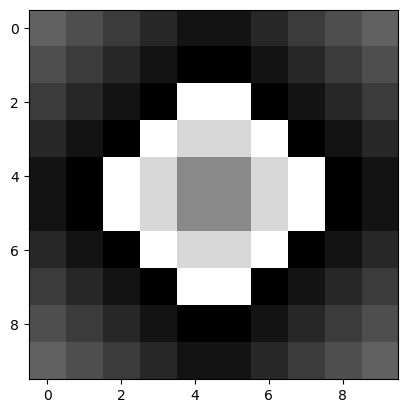

In [21]:
I = np.array([[96 , 80 , 64 , 48 , 32 , 32 , 48 , 64 , 80 , 96],
     [80 , 64 , 48 , 32 , 16 , 16 , 32 , 48 , 64 , 80],
     [64 , 48 , 32 , 16 , 224 , 224 , 16 , 32 , 48 , 64],
     [48 , 32 , 16 , 224 , 192 , 192 , 224 , 16 , 32 , 48],
     [32 , 16 , 224 , 192 , 128 , 128 , 192 , 224 , 16 , 32],
     [32 , 16 , 224 , 192 , 128 , 128 , 192 , 224 , 16 , 32],
     [48 , 32 , 16 , 224 , 192 , 192 , 224 , 16 , 32 , 48],
     [64 , 48 , 32 , 16 , 224 , 224 , 16 , 32 , 48 , 64],
     [80 , 64 , 48 , 32 , 16 , 16 , 32 , 48 , 64 , 80],
     [96 , 80 , 64 , 48 , 32 , 32 , 48 , 64 , 80 , 96]])

plt.imshow(I, cmap='gray')

**1.2.2** Testez votre fonction ```convolution2D``` pour effectuer un filtrage moyenneur sur l’image de synthèse ci-dessus (permettant de vérifier les calculs effectués manuellement) et sur l’image réelle ci-dessous _canvas.png_ (que vous aurez au préalable convertie en niveau de gris). Comparez les résultats obtenus avec différentes tailles de masque $3 \times 3$, $5 \times 5$, $7 \times 7$...

![Image](canvas.png)

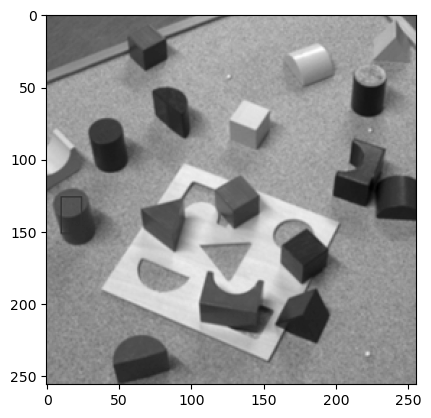

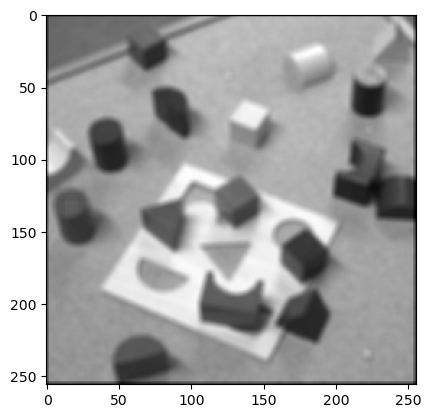

In [38]:
imgCanvas = cv.imread("canvas.png", 0)
h = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
imgConv = convolution2D(imgCanvas,h)

plt.imshow (imgCanvas, cmap="gray")
plt.show()
plt.imshow(imgConv, cmap="gray")
plt.show()

**1.2.3** Comparez également vos résultats avec ceux obtenus en utilisant directement la fonction de filtrage moyenneur d’**OpenCV** : 

_cv.blur(img,(n,n),borderType=cv.BORDER_CONSTANT)_ 

Cette fonction réalise un lissage moyenneur dans un voisinage $n \times n$ (matrice de convolution avec tous les coefficients identiques et leur somme qui vaut 1) et renvoie l’image résultat. Le paramètre _borderType=cv.BORDER_CONSTANT_ sert à effectuer un padding avec une valeur constante (zéro par défaut) autour de l'image d'entrée.

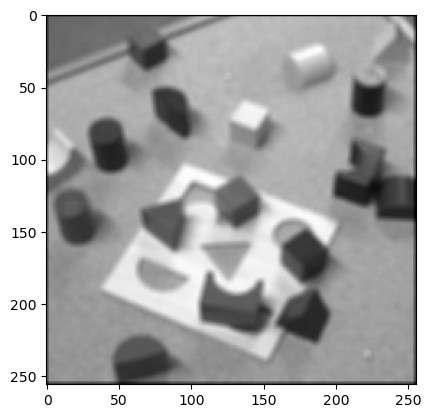

(256, 256) (256, 256)


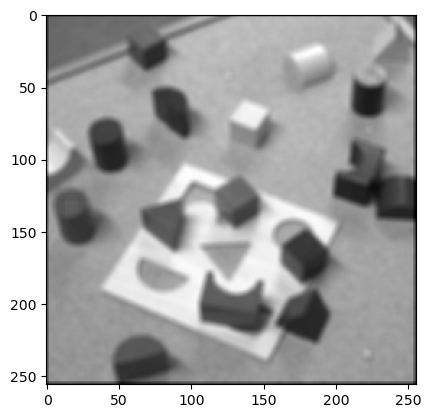

In [39]:
# A compléter...
a =cv.blur(imgCanvas,(5,5),borderType=cv.BORDER_CONSTANT)
plt.imshow(a, cmap="gray")
plt.show()
print(a.shape,imgConv.shape)
plt.imshow(imgConv, cmap="gray")
plt.show()


### 1.3 Filtrage/lissage gaussien :

**1.3.1** Effectuez un filtrage gaussien sur l’image _canvas.png_ en utilisant votre fonction ```convolution2D``` et le masque gaussien suivant :

\begin{equation}
h=\frac{1}{16}
\begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2\\
1 & 2 & 1\\
\end{bmatrix}
\end{equation}

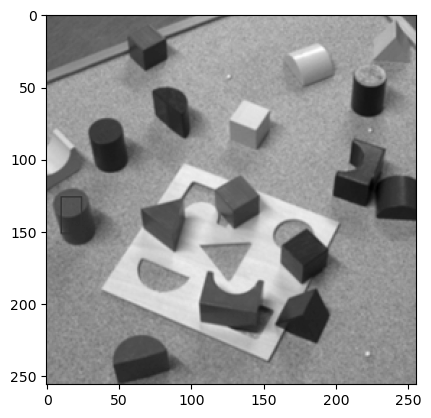

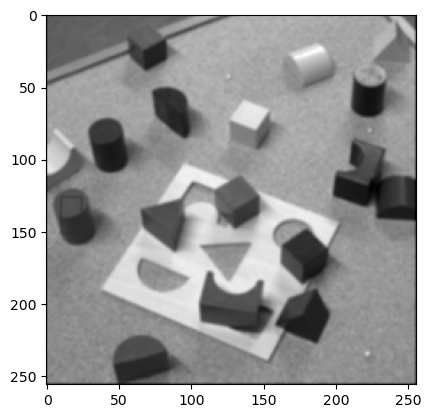

In [40]:
imgCanvas = cv.imread("canvas.png", 0)
h = np.array([[1,2,1],[2,4,2],[1,2,1]]) 
h= np.multiply(h,1/16)
imgConv = convolution2D(imgCanvas,h)

plt.imshow (imgCanvas, cmap="gray")
plt.show()
plt.imshow(imgConv, cmap="gray")
plt.show()

**1.3.2** Étudiez l’influence de la taille du masque ($3 \times 3$, $5 \times 5$, $7 \times 7$, ...) et de l’écart-type de la gaussienne.

**NB** : La fonction _cv2.getGaussianKernel_ permet de calculer des masques gaussiens. Par exemple,

```k = cv.getGaussianKernel(3,0.85)```

```k_2d = np.matmul(k, np.transpose(k))```

Permet d'obtenir un masque gaussien ```k_2d``` de taille $3 \times 3$ et d’écart-type $0.85$ (très proche du masque $h$ défini auparavant).

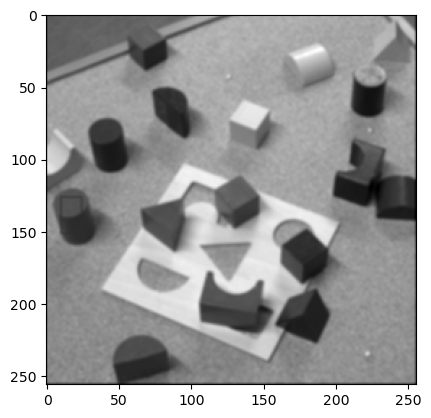

In [46]:
# A compléter...
k = cv.getGaussianKernel(3,0.85)
k_2d = np.matmul(k, np.transpose(k))
imgConv = convolution2D(imgCanvas,k_2d)

plt.imshow(imgConv, cmap="gray")
plt.show()

**1.3.3** Comparez vos résultats avec ceux obtenus en utilisant la fonction de filtrage gaussien d’OpenCV :

```newImg = cv2.GaussianBlur(img, (3, 3), 0.8, borderType=cv.BORDER_CONSTANT)``` pour appliquer par exemple un filtre avec un masque gaussien de taille $3 \times 3$ et d’écart-type $0.8$.

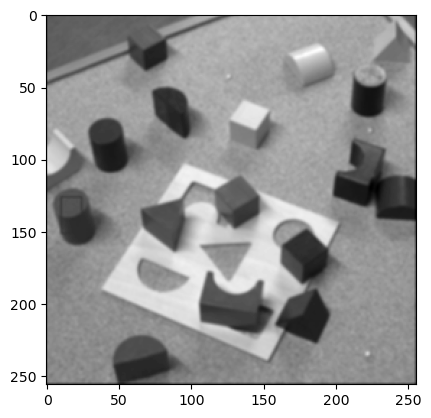

In [45]:
# A compléter...
newImg = cv.GaussianBlur(imgCanvas, (3, 3), 0.8, borderType=cv.BORDER_CONSTANT)
plt.imshow (newImg, cmap="gray")
plt.show()

## 2 Filtre d’ordre

Parmi les filtres d’ordre (filtre non-linéaire), il en existe trois basiques :
* le filtre _min_ qui renvoie la valeur minimum parmi les 9 pixels du voisinage (si on considère une fenêtre $3 \times 3$),
* le filtre _max_ qui renvoie la valeur maximum parmi les 9 pixels du voisinage (dans le cas d’une fenêtre $3 \times 3$),
* et le filtre _médian_ qui renvoie la valeur médiane parmi les 9 pixels du voisinage (dans le cas d’une fenêtre $3 \times 3$).

Le filtre _min_ noircit l’image puisqu’il privilégie des valeurs faibles tandis que le filtre _max_ éclaircit l’image. De plus, les filtres d’ordre ont tendance à uniformiser des petites régions. Les filtres _min_ et _max_ étant “peu intéressants”, étudions le cas du filtre _médian_.

**2.1** Écrivez une fonction qui implémente le filtre médian comme décrit ci-dessus.

In [5]:
def median(img, d): # d impaire
    m,n= img.shape
    result = np.zeros((m-d+1,n-d+1),dtype=np.uint8)
    for i in range(d//2,m-d//2):
        for j in range(d//2, n-d//2):
            window=img[i-d//2:i+d//2+1, j-d//2:j+d//2+1]
            result[i-d//2,j-d//2]=np.median(window)
    return result # A remplacer par le résultat du filtrage de img par un filtre médian avec une fenêtre de dimension d x d

**2.2** Testez votre fonction sur l’image _bateaux_nb_bruite.bmp_ pour en supprimer le bruit.

In [ ]:
imgRafio = cv.imread("bateaux_nb_bruite.bmp",0)
plt.imshow (imgRafio, cmap="gray")
plt.show()
TroisFoisFiltré= median(imgRafio,3)
plt.imshow (TroisFoisFiltré, cmap="gray")
plt.show()

**2.3** Comparez avec la fonction d’OpenCV _cv2.medianBlur(img, tailleVoisinage)_ (où _tailleVoisinage_ est un entier, par exemple 3 si on souhaite un voisinage $3 \times 3$).

In [ ]:
TroisFoisFiltré= median(imgRafio,3)
plt.imshow (TroisFoisFiltré, cmap="gray")
plt.show()

imgMedian = cv.medianBlur(imgRafio,3)
plt.imshow (imgMedian, cmap="gray")
plt.show()

**2.4** Testez aussi le filtre moyenneur sur l'image bruitée. Quel de deux filtres (médian ou moyenneur) vous semble plus adapté à ce type de bruit ?

In [ ]:
def moyenneur(img, d): # d impaire
    m,n= img.shape
    result = np.zeros((m-d+1,n-d+1),dtype=np.uint8)
    for i in range(d//2,m-d//2):
        for j in range(d//2, n-d//2):
            window=img[i-d//2:i+d//2+1, j-d//2:j+d//2+1]
            result[i-d//2,j-d//2]=np.mean(window)
    return result 




imgRafio = cv.imread("bateaux_nb_bruite.bmp",0)
plt.imshow (imgRafio,cmap="gray")
plt.show()

imgmedian= median(imgRafio,3)
plt.imshow (TroisFoisFiltré,cmap="gray")
plt.show()

imgmoyen= moyenneur(imgRafio,3) #le filtre moyenneur n'enlève pas totalement le bruit il le réduit juste
plt.imshow (TroisFoisFiltré,cmap="gray")
plt.show()

imgblur = cv.medianBlur(imgRafio,3)
plt.imshow (imgMedian,cmap="gray")
plt.show()